In [29]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa as lr
import librosa.display
from glob import glob
import IPython
from IPython.display import Audio
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import scipy.io.wavfile as wav
# from python_speech_features import mfcc, logfbank

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
gt_data = pd.read_csv('/content/gdrive/MyDrive/DATA612 Final Project/gtzan_features_30_sec.csv')
print(gt_data.shape)
gt_data.head()

(1000, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [9]:
# checking null values
gt_data[gt_data.isna()].value_counts().sum()

0

In [8]:
our_data = pd.read_csv('/content/gdrive/MyDrive/DATA612 Final Project/top_50_songs_features.csv')
print(our_data.shape)
our_data.head()

(54, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.000000.wav,30000.000000,0.401282,0.086966,0.133645,0.009270,2285.466215,1.526304e+06,2458.856004,481152.227178,...,73.30818,-5.018557,75.411310,3.809938,43.845936,-8.759356,43.631207,-4.040365,59.195137,blues
1,blues.000001.wav,30000.000000,0.326063,0.102756,0.148318,0.031166,1207.054377,6.459471e+05,1481.555388,709502.398726,...,69.39578,-3.525022,42.324207,-1.874528,42.235626,-7.966536,44.953590,-4.028606,67.800440,blues
2,classical.00000.wav,30013.333333,0.252361,0.084149,0.036233,0.000221,1505.357460,4.443073e+04,1559.228895,43765.373123,...,86.13082,-0.318471,100.835740,1.773055,95.493810,0.888721,97.099720,-0.835078,120.920820,classical
3,country.00000.wav,30081.632653,0.383930,0.081185,0.248296,0.000716,2798.065627,3.546250e+05,2847.541181,105655.136749,...,68.59460,0.612088,54.308323,4.062127,74.348236,0.907919,68.547610,4.093193,73.602806,country
4,disco.000000.wav,30000.000000,0.383889,0.101591,0.127326,0.008411,2739.188163,1.498203e+06,2460.869989,333219.464706,...,63.21444,-10.986168,89.658240,-2.868585,70.230286,-13.567414,63.092510,-2.138512,76.132126,disco


In [24]:
# label encoding
gt_data['label'] = preprocessing.LabelEncoder().fit_transform(gt_data['label'])
our_data['label'] = preprocessing.LabelEncoder().fit_transform(our_data['label'])

In [44]:
# dividing the data into train and test sets
X_gt = gt_data.drop(['label', 'filename'], axis=1)
y_gt = gt_data['label']
X_50 = our_data.drop(['label', 'filename'], axis=1)
y_50 = our_data['label']

In [45]:
X_train = X_gt
y_train = y_gt
X_test = X_50
y_test = y_50

In [26]:
# scaling the features
transformer = preprocessing.MinMaxScaler()
X_train_trans = transformer.fit_transform(X_train)
X_train = pd.DataFrame(X_train_trans, columns = X_train.columns)

X_test_trans = transformer.fit_transform(X_test)
X_test = pd.DataFrame(X_test_trans, columns = X_test.columns)

In [27]:
X_train.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.113487,0.362279,0.695468,0.318188,0.101983,0.314117,0.040233,0.422879,0.109789,0.385532,...,0.564186,0.112704,0.541287,0.057615,0.422444,0.082450,0.487950,0.109503,0.599189,0.078255
1,0.113487,0.343622,0.793392,0.230894,0.085580,0.248405,0.121475,0.436889,0.296867,0.353329,...,0.570198,0.120353,0.574685,0.118286,0.448184,0.102997,0.548800,0.099081,0.579640,0.075947
2,0.113487,0.389832,0.640692,0.433652,0.099064,0.254261,0.049046,0.325334,0.095712,0.289224,...,0.622467,0.081898,0.331003,0.085962,0.370988,0.116420,0.453724,0.087317,0.501381,0.045405
3,0.113487,0.473508,0.777954,0.345856,0.229160,0.129376,0.058253,0.267404,0.227566,0.181068,...,0.565151,0.091876,0.484549,0.092509,0.460684,0.068975,0.538690,0.062612,0.468060,0.048168
4,0.113487,0.277759,0.681062,0.219641,0.083075,0.327270,0.110761,0.325514,0.113536,0.357017,...,0.383289,0.200462,0.410225,0.156424,0.403875,0.120300,0.424652,0.130173,0.233047,0.094836


In [30]:
# building the model 
model = keras.Sequential()
model.add(layers.Flatten(input_shape = (58,)))
model.add(layers.Dense(256, activation ='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation ='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 58)                0         
                                                                 
 dense (Dense)               (None, 256)               15104     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [38]:
# compiling the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fitting the model
history = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs=400)

Epoch 1/400
32/32 [==============================] - 1s 10ms/step - loss: 0.0649 - accuracy: 0.9750 - val_loss: 12.2668 - val_accuracy: 0.3889
Epoch 2/400
32/32 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9880 - val_loss: 13.1322 - val_accuracy: 0.3519
Epoch 3/400
32/32 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9800 - val_loss: 12.4044 - val_accuracy: 0.4259
Epoch 4/400
32/32 [==============================] - 0s 4ms/step - loss: 0.0573 - accuracy: 0.9820 - val_loss: 12.1785 - val_accuracy: 0.3889
Epoch 5/400
32/32 [==============================] - 0s 4ms/step - loss: 0.0456 - accuracy: 0.9840 - val_loss: 12.3356 - val_accuracy: 0.4074
Epoch 6/400
32/32 [==============================] - 0s 4ms/step - loss: 0.0806 - accuracy: 0.9770 - val_loss: 13.0973 - val_accuracy: 0.3519
Epoch 7/400
32/32 [==============================] - 0s 4ms/step - loss: 0.0619 - accuracy: 0.9780 - val_loss: 13.9611 - val_accuracy: 0.3148
Epoch

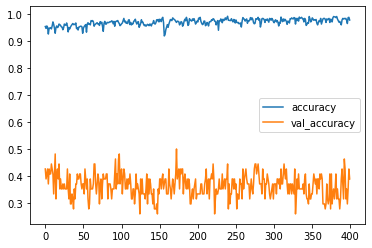

In [36]:
plt.figure()
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.plot(history.history['loss'], label = 'train loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [50]:
X_train_gt, X_test_gt, y_train_gt, y_test_gt = train_test_split(X_gt, y_gt, test_size=0.2)

In [51]:
history = model.fit(x = X_train_gt, y = y_train_gt, validation_data = (X_test_gt, y_test_gt), epochs=50)

Epoch 1/50
25/25 [==============================] - 0s 8ms/step - loss: 2.3058 - accuracy: 0.1025 - val_loss: 2.3010 - val_accuracy: 0.0900
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 2.3011 - accuracy: 0.1138 - val_loss: 2.3028 - val_accuracy: 0.0900
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 222.3890 - accuracy: 0.1100 - val_loss: 2.3036 - val_accuracy: 0.0900
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 12.9301 - accuracy: 0.1050 - val_loss: 2.3046 - val_accuracy: 0.0900
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 2.2991 - accuracy: 0.0925 - val_loss: 2.3062 - val_accuracy: 0.0900
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 242.7041 - accuracy: 0.0988 - val_loss: 2.3059 - val_accuracy: 0.0900
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 6234.9307 - accuracy: 0.1050 - val_loss: 2.3059 - val_accuracy: 0.0900
Epoch 8/50
2

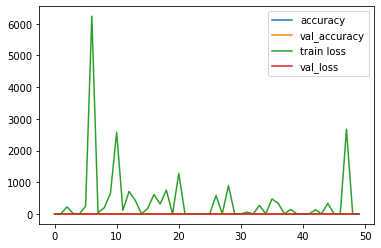

In [54]:
plt.figure()
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()